<a href="https://colab.research.google.com/github/ahxdali/spotify-music-clustering/blob/main/spotify_music_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


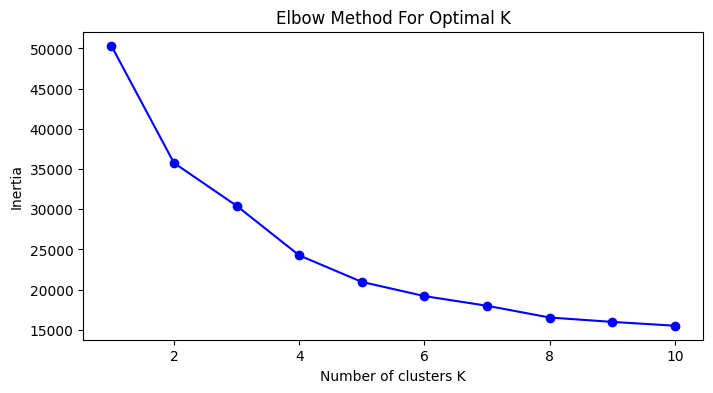

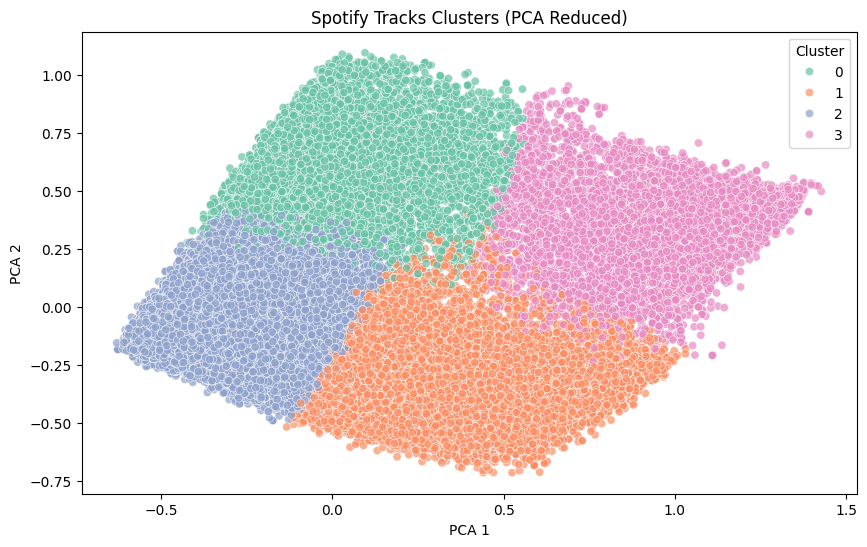


Cluster counts:
cluster
2    63070
1    30515
0    12607
3     7808
Name: count, dtype: int64

Average audio features per cluster:
          danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.562394  0.768171  -8.277656     0.074139      0.068024   
1            0.550045  0.439253 -10.129650     0.089318      0.692969   
2            0.597191  0.767323  -5.960163     0.088354      0.113129   
3            0.393911  0.209329 -19.486597     0.053492      0.865929   

         instrumentalness  liveness   valence       tempo  
cluster                                                    
0                0.758548  0.199080  0.331102  127.408964  
1                0.016323  0.219726  0.460247  115.682481  
2                0.018102  0.220287  0.540156  126.187455  
3                0.843603  0.158398  0.225091  106.290340  


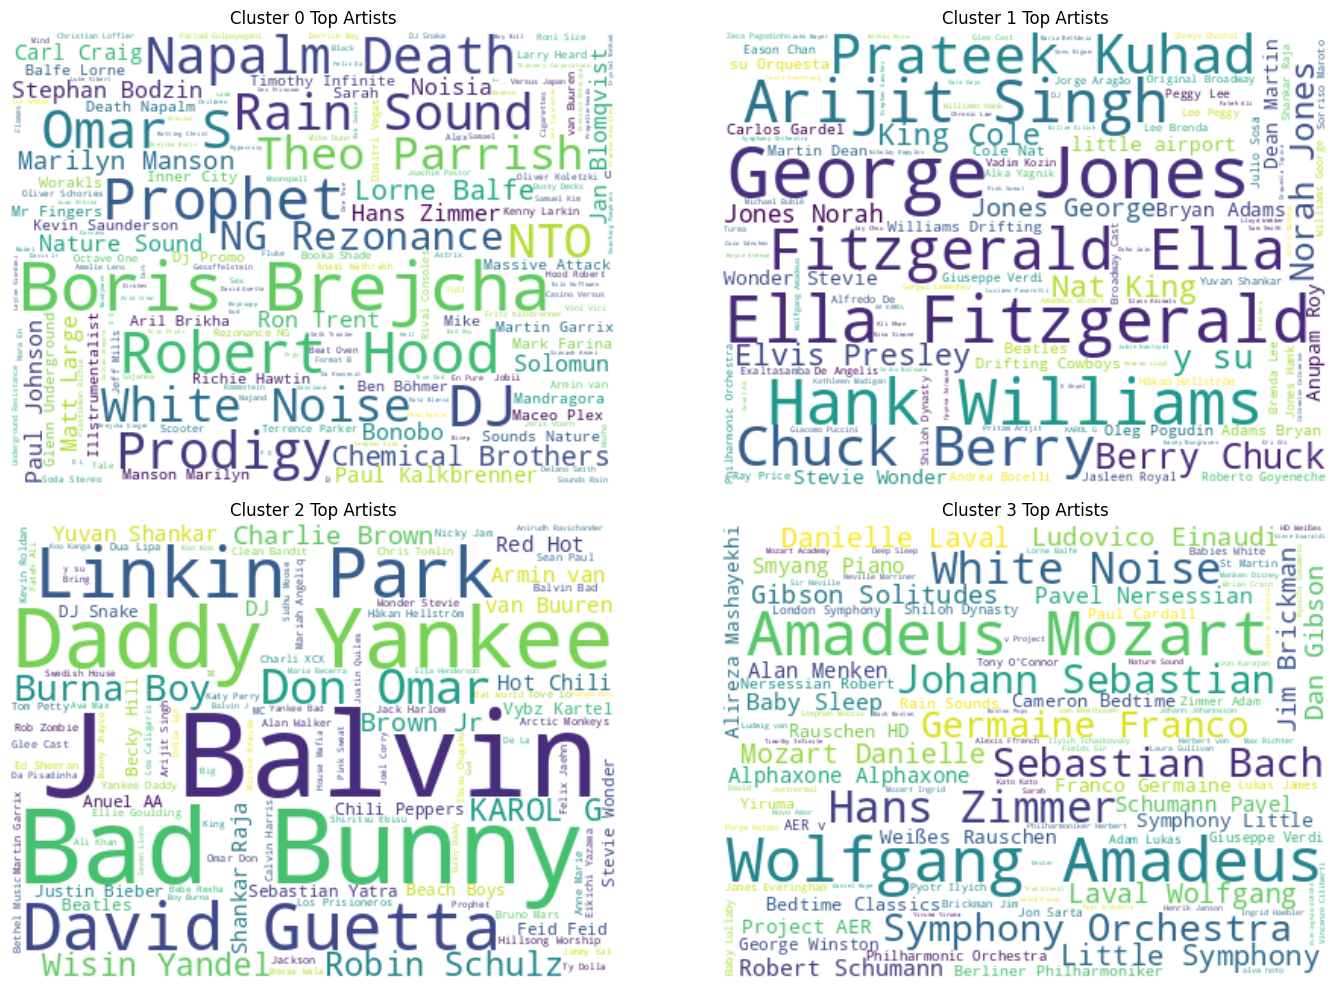

In [3]:
# 1. Install any missing packages (run once)
!pip install wordcloud

# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud

# 3. Upload dataset (run this and upload your 'spotify_tracks.csv' file)
from google.colab import files
uploaded = files.upload()

# 4. Load dataset
df = pd.read_csv('spotify_tracks.csv')

# 5. Inspect dataset
print(df.head())
print(f"\nDataset shape: {df.shape}")
print("\nColumns:\n", df.columns)

# 6. Select relevant audio features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df_selected = df[features].copy()

# 7. Check for missing values and drop if any
print("\nMissing values per column:\n", df_selected.isnull().sum())
df_selected.dropna(inplace=True)

# 8. Normalize features to [0,1] range
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

# 9. Find optimal K using Elbow Method (optional but recommended)
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# 10. Choose K (e.g., 4) based on elbow plot and fit KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# 11. Add cluster labels to original dataframe
df['cluster'] = clusters

# 12. PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# 13. Plot clusters in PCA space
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='Set2', data=df, alpha=0.7)
plt.title('Spotify Tracks Clusters (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# 14. Analyze cluster sizes
print("\nCluster counts:")
print(df['cluster'].value_counts())

# 15. Average audio features per cluster
cluster_summary = df.groupby('cluster')[features].mean()
print("\nAverage audio features per cluster:\n", cluster_summary)

# 16. Optional: Word clouds for top artists in each cluster
plt.figure(figsize=(15, 10))
for cluster_num in range(k):
    plt.subplot(2, 2, cluster_num+1)
    artists = df[df['cluster'] == cluster_num]['artists'].dropna()
    text = " ".join(artists)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_num} Top Artists')
plt.tight_layout()
plt.show()

